# Первичный анализ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

trainDataset = pd.read_csv('train.csv')

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-dhocoh4l because the default path (/home/nikita/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


Выведем информацию о колонках в данном датасете.

In [2]:
print(trainDataset.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [3]:
trainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
trainDataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
trainDataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
trainDataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andersson, Mr. Anders Johan",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
missing_values_count = trainDataset.isnull().sum()

# Просмотр статистики по пустым значениям в таблице
missing_values_count[0:12]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Из первичного анализа можно заметить, что очень много выбросов в колонке Cabin(~76% выбросов(пустых значений) и высокий процент уникальных полей из ~24% оставшихся непустых значений). Ticket, Name, PassengerId - ненужные поля с уникальными значениями.

In [8]:
trainDataset = trainDataset.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1) 

In [9]:
print(trainDataset.columns.values)

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


In [10]:
trainDataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
trainDataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
trainDataset['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [13]:
trainDataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
trainDataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
trainDataset['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
trainDataset['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [17]:
trainDataset['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

Survived - столбец, говорит о том выжил ли пассажир, принимает значение 0 или 1 . 1 если выжил , 0 если нет.

Pclass - Класс пассажира.

Sex - пол пассажира. 

Age - возраст пассажира.

SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры). 

Parch-содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети). 

Fare - цена билета. Пропусков в данных нету.

Embarked- порт посадки. Есть немного пропусков. Возможные значения S,C,Q, где C — Cherbourg, Q — Queenstown, S — Southampton.

# Преобразования датасета

In [18]:
# Привожу Sex к числовому типу. Женщина - 1, Мужчина - 0
trainDataset['Sex'] = trainDataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [19]:
trainDataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [20]:
# Замена пропусков по возрасту средним значением
trainDataset['Age'] = trainDataset['Age'].fillna(trainDataset['Age'].mean())
(trainDataset['Age'].isnull()).mean()

0.0

In [21]:
# Замена пропусков самым популярным значением в колонке Embarked
freq_port = trainDataset.Embarked.dropna().mode()[0]
trainDataset['Embarked'] = trainDataset['Embarked'].fillna(freq_port)

trainDataset['Embarked'] = trainDataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [22]:
missing_values_count = trainDataset.isnull().sum()


missing_values_count[0:8]

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
trainDataset['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [24]:
trainDataset['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [25]:
trainDataset['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

# Визуализация зависимостей

In [26]:
# 
trainDataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [27]:
trainDataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


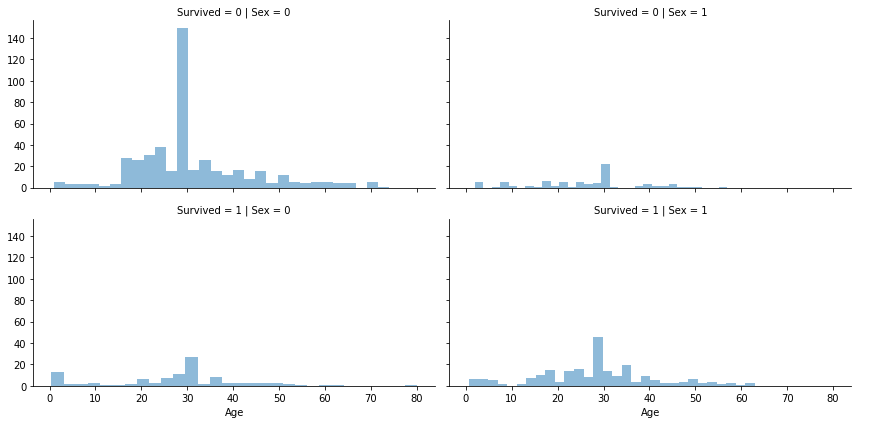

In [28]:
# Распределение по возрасту
# Количество выживших и не выживших людей, которые принадлежат одному из полов(м или ж) 
grid = sns.FacetGrid(trainDataset, col='Sex', row='Survived', height=3.0, aspect=2.0)
grid.map(plt.hist, 'Age', alpha=.5, bins=30)
grid.add_legend()

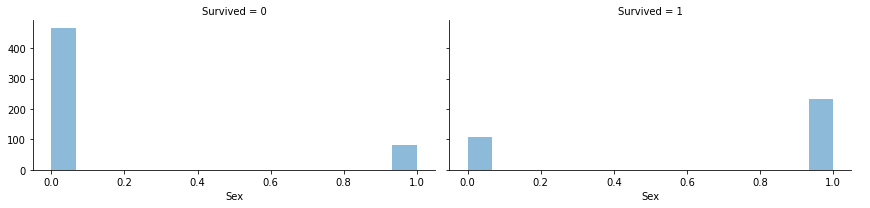

In [29]:
# Количество выживших и не выживших людей, которые принаджелат одному из полов
grid = sns.FacetGrid(trainDataset, col='Survived', height=3.0, aspect=2.0)
grid.map(plt.hist, 'Sex', alpha=.5, bins=15)
grid.add_legend()

In [30]:
trainDataset[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


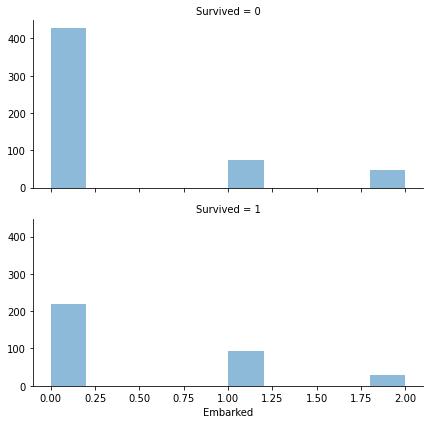

In [31]:
grid = sns.FacetGrid(trainDataset, row='Survived', height=3.0, aspect=2.0)
grid.map(plt.hist, 'Embarked', alpha=.5, bins=10)
grid.add_legend()

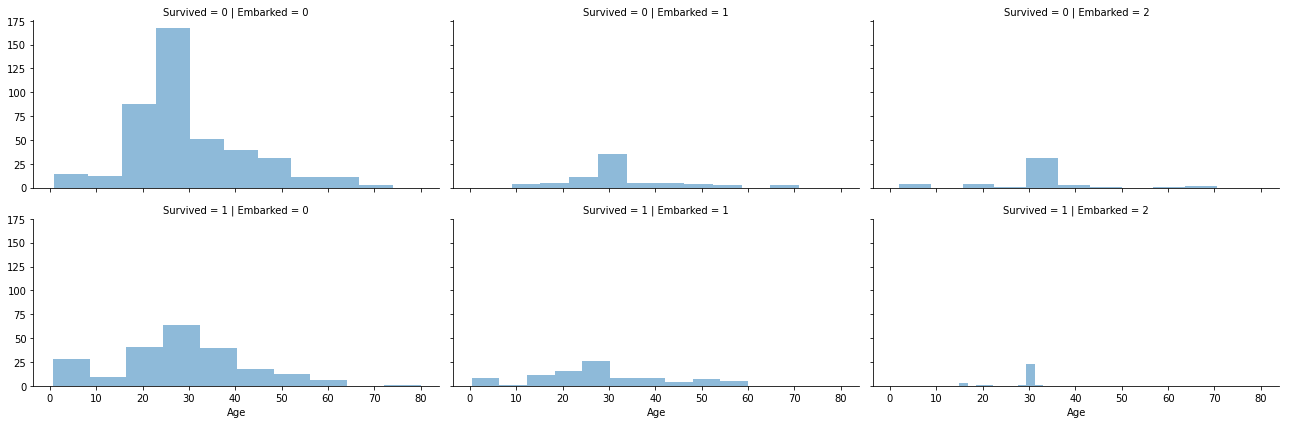

In [32]:
# Распределение по возрасту
# Количество выживших и не выживших людей, которые принаджелат одному из портов посадки(S:1 || C:2 || Q:3) 
grid = sns.FacetGrid(trainDataset, col='Embarked', row='Survived', height=3.0, aspect=2.0)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend()

In [33]:


trainDataset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


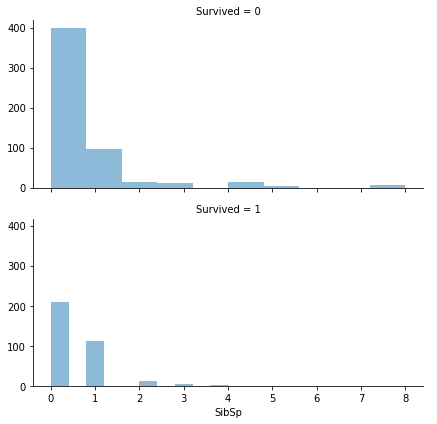

In [34]:
grid = sns.FacetGrid(trainDataset, row='Survived', height=3.0, aspect=2.0)
grid.map(plt.hist, 'SibSp', alpha=.5, bins=10)
grid.add_legend()

In [35]:
trainDataset[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


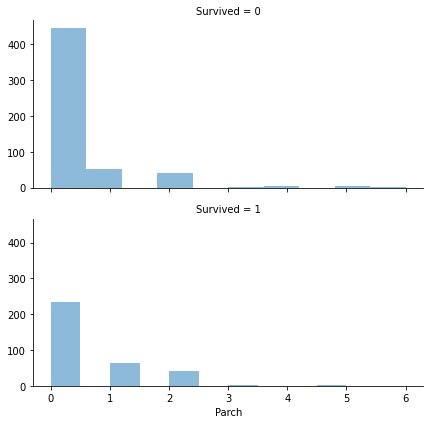

In [36]:
grid = sns.FacetGrid(trainDataset, row='Survived', height=3.0, aspect=2.0)
grid.map(plt.hist, 'Parch', alpha=.5, bins=10)
grid.add_legend()

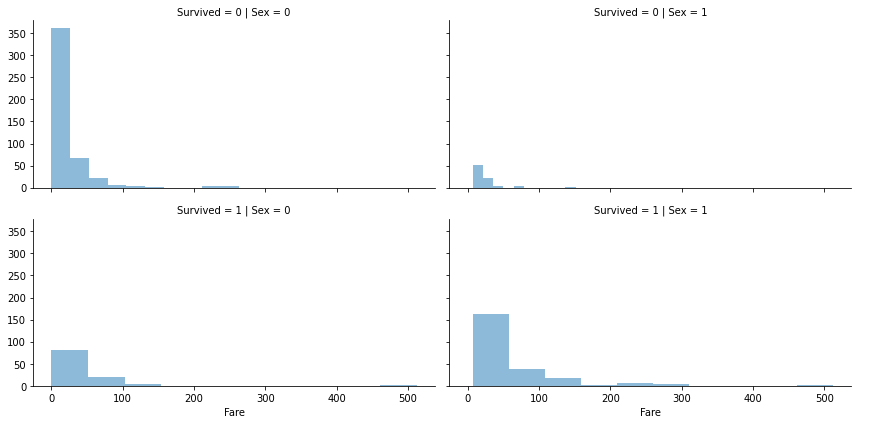

In [37]:
# Распределение по цене билета
# Количество выживших и не выживших людей, которые принаджелат одному из полов
grid = sns.FacetGrid(trainDataset,col = 'Sex', row='Survived', height=3.0, aspect=2.0)
grid.map(plt.hist, 'Fare', alpha=.5, bins=10)
grid.add_legend()

In [38]:
trainDataset.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


### Выводы:

* Люди из 3-ого класса умирают чаше всех остальных. Выживают же чаще всех люди из первого класса. Люди из второго класса могут с примерно равной вероятностью выжить или умереть.

* Среди выживших в 4 раза больше женщин, чем мужчин. На графике можно заметить, что женщины выживали примерно в 2 раза чаще чем умирали, мужчины ~ в 4 раза чаще умирали. Также большинство выживших зафиксировано с возрастом около 30 лет.

* По статистике чаще выживают люди у которых порт посадки C:1. Среди пассажиров с S:0 и Q:2 схожее значение выживаемости по статистике.Однако при этом  зафиксировано самое большое количество посадок с порта S:0 и самое большое количество выживших у которых порт посадки S:0.

* Больше всего выживших по количеству,где SibSp == 0 || Parch == 0. Однако люди, где SibSp == 1 || 2 умирают реже, чем со значением sibSp = 0. Люди, где Parch == 1 || 2 || 3 умирают реже, чем со значением Parch = 0.

* Больше всех умирают люди с билетами до примерно 100 долларов. Также можно сказать, что люди чья стоимость билетов находится около 500 долларов не умирают.




# Реализация алгоритма k ближайших соседей с использованием весов и наивного байесовского классификатора

### Алгоритм k ближайших соседей с использованием весов

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split

X, Y = trainDataset.drop(columns=['Survived']).to_numpy(), np.array(trainDataset['Survived'])

#разбиваю выборку на трейн и тест. Для теста выделяю 30% выборки.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,random_state=42,shuffle = True)


In [40]:
# евклидова метрика
def distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))
    #return np.sum(np.absolute(a - b))

def myKnn(xData, k, xTrain, yTrain):
    y = np.zeros(xData.shape[0])
    n = xData.shape[0]
    for index in range(n):
        xLine = xData[index]
        distanceData = np.zeros((n,2))
        # расстояние до каждого вектора из обучающей выборки
        for i in range(n):
            distanceData[i][0] = i
            distanceData[i][1] = distance(xLine,xTrain[i])
        # сортирую по значению расстояния до вектора
        neighbors = sorted(distanceData, key = lambda x : x[1])[:k]
        amount = [0,0]
        # определяю какое значение преобладает у k "ближайших соседей"
        for i in range(k):
            amount[yTrain[int(neighbors[i][0])]] += 1
        if amount[0] > amount[1]:
            y[index] = 0
        else:
            y[index] = 1
    return y

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# основные метрики
def print_accuracy(y, y0):
    tp, fp, tn, fn = 0, 0, 0, 0

    for i in range(y.shape[0]):
        if y[i] == 0 and y0[i] == 0: tn += 1
        if y[i] == 1 and y0[i] == 0: fn += 1
        if y[i] == 0 and y0[i] == 1: fp += 1
        if y[i] == 1 and y0[i] == 1: tp += 1
        
    print('Accuracy:', (tp + tn) / (tp + tn + fp + fn))
    print('Precision:', tp / (tp + fp))
    print('Recall:', tp / (tp + fn))

print("lib KNeighborsClassifier")
sk_knn = KNeighborsClassifier(n_neighbors=25, weights="distance")
sk_knn.fit(Xtrain, Ytrain)
print_accuracy(Ytest, sk_knn.predict(Xtest))
print("------------")
print("my KNeighborsClassifier")
print_accuracy(Ytest, myKnn(Xtest,25, Xtrain, Ytrain))

lib KNeighborsClassifier
Accuracy: 0.7126865671641791
Precision: 0.7428571428571429
Recall: 0.46846846846846846
------------
my KNeighborsClassifier
Accuracy: 0.6902985074626866
Precision: 0.7692307692307693
Recall: 0.36036036036036034


Таким образом я использовал в библиотечной версии количество соседей 25, метрики и вариант сортировки также соответствуют. По метрике Precision и при текущих настройках моя реализация knn точнее на 2-3%. Recall демонстрирует о том, что мой алгоритм knn хуже предсказывает положительные ответы(выживших людей).

### Реализация наивного байесовского классификатора

Наивный Байесовский классификатор оценивает вероятности принадлежности строки к классам и возвращает класс с наибольшей вероятностью. Эти вероятности вычисляются как произведения условных вероятностей для каждого элемента строки и вероятности данного класса. В своем примере я использовал нормальное распределение.

In [42]:
class NBayes():
    
    @staticmethod
    def probChars(X):
        # среднее значение величины - мат. ожидание
        means = np.mean(X, axis=0)
        # среднее квадратичное отклонение
        stds = np.std(X, axis=0)
        return list(zip(means, stds))

    @staticmethod
    def gaussProb(x, mean, std):
        return (1 / np.sqrt(2 * np.pi * np.square(std))) * np.exp(-np.square(x - mean) / (2 * np.square(std)))

    def fit(self, X, y):
        classRows = {}
        for row, cls in zip(X, y):
            if cls not in classRows:
                classRows[cls] = list()
            classRows[cls].append(row)
        self.clsLabels = np.unique(y)
        # мат. ожидание и отклонение для каждого поля и для уникального значения 0 и 1
        self.charsByClass = {cls: NBayes.probChars(rows) for cls, rows in classRows.items()}
        # вероятности для уникального значения 0 и 1
        self.probByClass = {cls: len(rows) / len(X) for cls, rows in classRows.items()}
        

    def predict(self, X):
        y = []
        for row_to_predict in X:
            resultProbs = {}
            for cls in self.clsLabels:
                # произведение плотности распределений полей
                likelhood = 1
                for i, (mean, std) in enumerate(self.charsByClass[cls]):
                    likelhood *=  NBayes.gaussProb(row_to_predict[i], mean, std)
                resultProbs[cls] = self.probByClass[cls] * likelhood
                # уникальное значение у которого max(self.probByClass[cls] * likelhood)
            y.append(max(resultProbs.items(), key=lambda kv: kv[1])[0])
        return y

In [43]:
from sklearn.naive_bayes import GaussianNB
print("my NBayes")
bayes = NBayes()
bayes.fit(Xtrain, Ytrain)
print_accuracy(Ytest, bayes.predict(Xtest))
print("-------------")
print("lib NBayes")
sklearn_bayes = GaussianNB()
sklearn_bayes.fit(Xtrain, Ytrain)
print_accuracy(Ytest, sklearn_bayes.predict(Xtest))

my NBayes
Accuracy: 0.7985074626865671
Precision: 0.7614678899082569
Recall: 0.7477477477477478
-------------
lib NBayes
Accuracy: 0.7985074626865671
Precision: 0.7614678899082569
Recall: 0.7477477477477478


Как видно, значение метрик совпадают. Данный классификатор лучше распознает положительные ответы, точность исследования получилось примерно равная.

In [44]:
trainDataset.to_csv('train_v1.csv',index=False)